In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

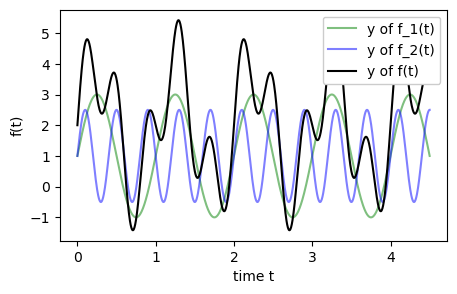

In [134]:
t = np.linspace(0, 4.5, 1000)

# way to create sin function
def c_sin(t, a, f):
    return a * np.sin(2 * np.pi * f * t) + 1

# 2 random sin functions
y_1 = c_sin(t, 2.0, 1.0)
y_2 = c_sin(t, 1.5, 2.5)
# complex oscillating function to deconstruct into initial frequencies
y = y_1 + y_2

plt.figure(figsize=(5, 3))
sns.lineplot(x=t, y=y_1, color='green', label='y of f_1(t)', alpha=0.5)
sns.lineplot(x=t, y=y_2, color='blue', label='y of f_2(t)', alpha=0.5)
sns.lineplot(x=t, y=y, color='black', label='y of f(t)')
plt.xlabel('time t')
plt.ylabel('f(t)')
plt.legend(loc='upper right', framealpha=1.0)
plt.show()

/var/folders/tg/bfb__1d16td__2vd879zjkrh0000gn/T/ipykernel_7736/1359151787.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


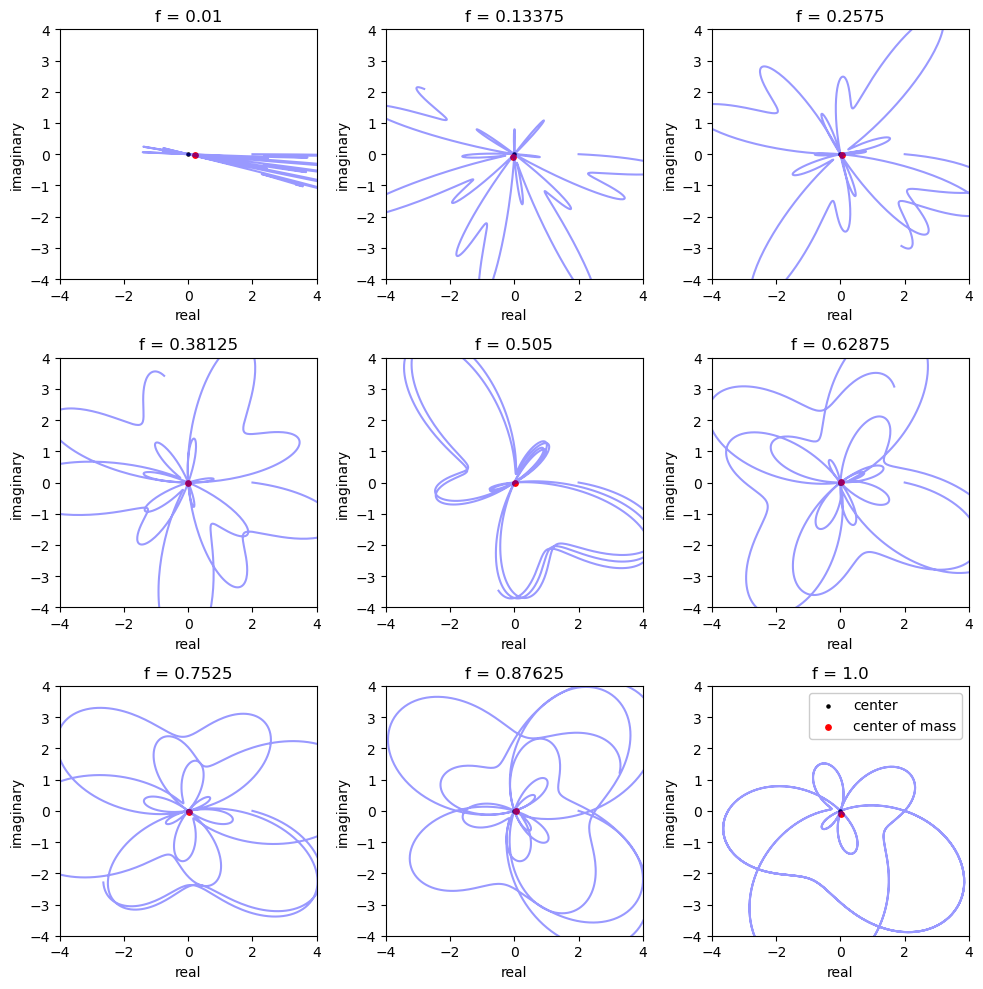

In [141]:
# Transforming into the complex plane to utilize the rotation "center of mass" idea

# frequencies to explore
fs = np.linspace(0.01, 1, 9)

plt.figure(figsize=(10, 10))
for i, f in enumerate(fs):
    # this transforms our y values into the complex plane
    complex_y = y*np.exp(-2*np.pi*1j*t*f)
    # this may be an alternative to trapz??
    cum_sum_y = np.cumsum(complex_y)
    # numerical integration equivalent since we have discrete values instead of a continuous function
    c_of_mass = np.trapz(complex_y, dx=0.0001) # requires low dx to be precise (sample accuracy)

    # Plot
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.plot(complex_y.real, complex_y.imag, c='blue', alpha=0.4)
    plt.scatter([0], [0], c='black', label='center', s=5)
    plt.scatter([c_of_mass.real], [c_of_mass.imag], c='red', label='center of mass', s=15)
    # sns.scatterplot(x=complex_y.real, y=complex_y.imag, color='black', label='y(t)')
    plt.xlabel('real')
    plt.ylabel('imaginary')
    plt.title(f'f = {f}')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
plt.legend(loc='upper right', framealpha=1.0)
plt.show()